# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Tora Digda Kristiawan
- **Email:** toradigda@gmail.com
- **ID Dicoding:** toradk

## Menentukan Pertanyaan Bisnis

- dalam keadaan seperti apa sepeda banyak di sewa?
- Berapa jumlah sepeda yang disewa setiap bulan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")



In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
#day_df
# cek info
day_df.info()
# cek jumlah missing value
day_df.isna().sum()
# cek jumlah data yang terduplikasi
print("jumlah duplikasi :", day_df.duplicated().sum())
# cek deskripsi tabel
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
jumlah duplikasi : 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
#hour_df
# cek info
hour_df.info()
# cek jumlah missing value
hour_df.isna().sum()
# cek jumlah data yang terduplikasi
print("jumlah duplikasi :", hour_df.duplicated().sum())
# cek deskripsi tabel
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
jumlah duplikasi : 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [6]:
# mengubah tipe data dteday dari object menjadi datetime

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
day_df.to_csv('new_day_data.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

1. dalam keadaan seperti apa sepedah banyak di sewa?

In [8]:
day_df["season"] = day_df.season.apply(lambda x: "springer" if x == 1 else("summer" if x == 2 else ("fall" if x == 3 else "winter")))
bike_season_perday_df = day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)
print(bike_season_perday_df)

season
fall        1061129
summer       918589
winter       841613
springer     471348
Name: cnt, dtype: int64


In [9]:

day_df["workingday"] = day_df.workingday.apply(lambda x: "weekend nor holiday" if x == 1 else "otherwise")
bike_working_perday_df = day_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

print(bike_working_perday_df)

workingday
weekend nor holiday    2292410
otherwise              1000269
Name: cnt, dtype: int64


In [10]:
day_df["weathersit"] = day_df.weathersit.apply(lambda x: "clear" if x == 1 else("mist" if x == 2 else ("light snow" if x == 3 else "heavy rain")))
bike_weathersit_perday_df = day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

print(bike_weathersit_perday_df)

weathersit
clear         2257952
mist           996858
light snow      37869
Name: cnt, dtype: int64


In [11]:
hour_df["season"] = hour_df.season.apply(lambda x: "springer" if x == 1 else("summer" if x == 2 else ("fall" if x == 3 else "winter")))
bike_season_perhour_df = hour_df.groupby(by="season").cnt.sum().sort_values(ascending=False)
print(bike_season_perhour_df)

season
fall        1061129
summer       918589
winter       841613
springer     471348
Name: cnt, dtype: int64


In [12]:
hour_df["workingday"] = hour_df.workingday.apply(lambda x: "weekend nor holiday" if x == 1 else "otherwise")
bike_working_perhour_df = hour_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)
print(bike_working_perhour_df)


workingday
weekend nor holiday    2292410
otherwise              1000269
Name: cnt, dtype: int64


In [13]:
hour_df["weathersit"] = hour_df.weathersit.apply(lambda x: "clear" if x == 1 else("mist" if x == 2 else ("light snow" if x == 3 else "heavy rain")))
bike_weathersit_perhour_df = hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

print(bike_weathersit_perhour_df)

weathersit
clear         2338173
mist           795952
light snow     158331
heavy rain        223
Name: cnt, dtype: int64


2. Berapa jumlah sepeda yang disewa setiap hari/minggu/bulan?

In [14]:
# month weekday

monthly_bike_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

monthly_bike_df.index = monthly_bike_df.index.strftime('%Y-%m')
monthly_bike_df = monthly_bike_df.reset_index()
monthly_bike_df.rename(columns={
    "cnt": "count"
}, inplace=True)

print(monthly_bike_df)

     dteday   count
0   2011-01   38189
1   2011-02   48215
2   2011-03   64045
3   2011-04   94870
4   2011-05  135821
5   2011-06  143512
6   2011-07  141341
7   2011-08  136691
8   2011-09  127418
9   2011-10  123511
10  2011-11  102167
11  2011-12   87323
12  2012-01   96744
13  2012-02  103137
14  2012-03  164875
15  2012-04  174224
16  2012-05  195865
17  2012-06  202830
18  2012-07  203607
19  2012-08  214503
20  2012-09  218573
21  2012-10  198841
22  2012-11  152664
23  2012-12  123713


C:\Users\msi123\AppData\Local\Temp\ipykernel_33408\4025098028.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bike_df = day_df.resample(rule='M', on='dteday').agg({


## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\msi123\AppData\Local\Temp\ipykernel_33408\2879646808.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="rent_count", data=bike_season_perday_df, palette=palette, ax=ax[0])
C:\Users\msi123\AppData\Local\Temp\ipykernel_33408\2879646808.py:26: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x="season", y="rent_count", data=bike_season_perday_df, palette=palette, ax=ax[0])
C:\Users\msi123\AppData\Local\Temp\ipykernel_33408\2879646808.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="rent_count", data=bike_working_perday_df, palette=palette, ax=ax[1])
C:\Users\msi123\AppData\Local\Temp\i

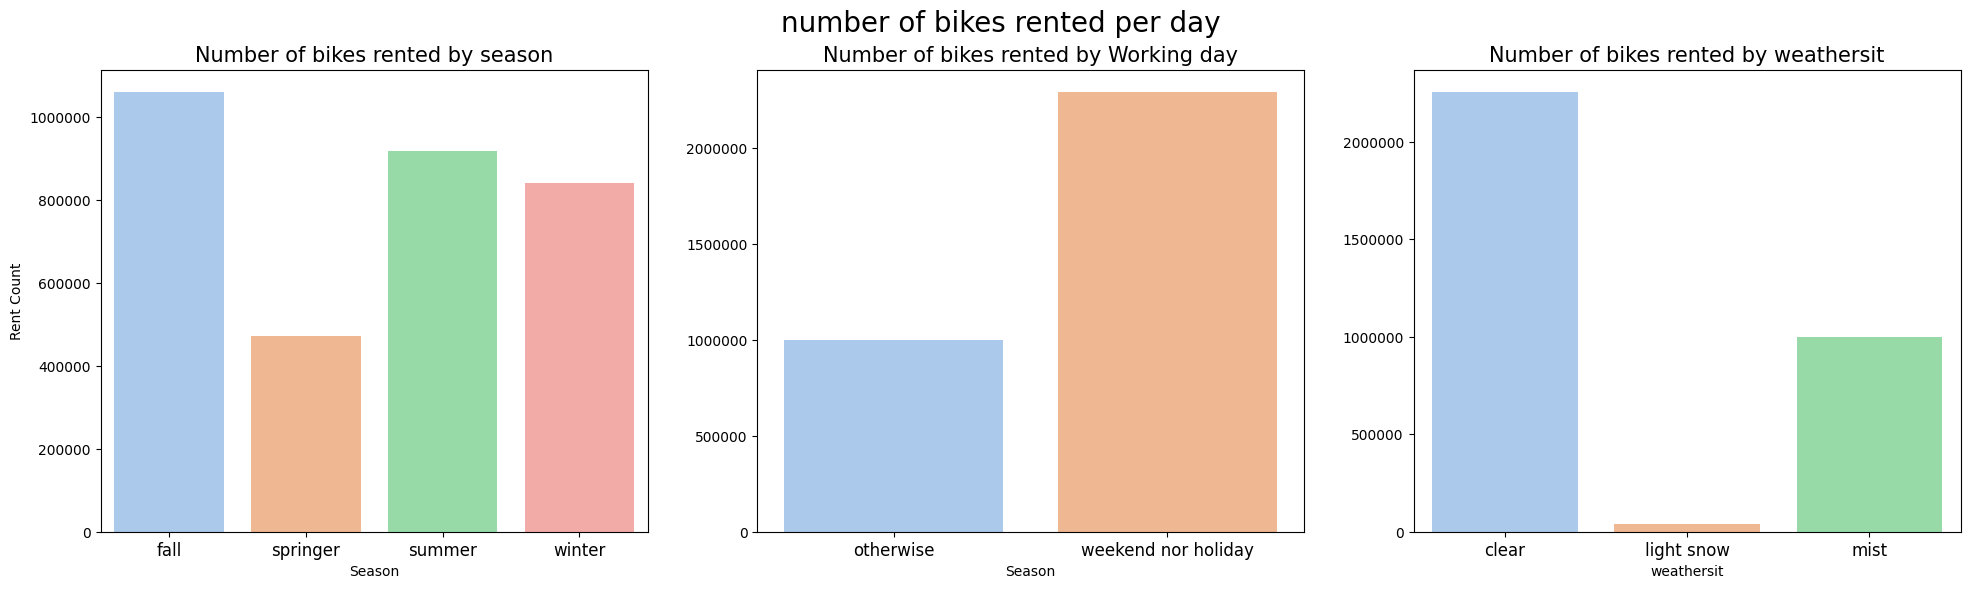

In [15]:
palette = sns.color_palette("pastel") 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

bike_season_perday_df = day_df.groupby(by="season").cnt.sum().reset_index()
bike_working_perday_df = day_df.groupby(by="workingday").cnt.sum().reset_index()
bike_weathersit_perday_df = day_df.groupby(by="weathersit").cnt.sum().reset_index()

bike_season_perday_df.rename(columns={
    "cnt": "rent_count"
}, inplace=True)

bike_working_perday_df.rename(columns={
    "cnt": "rent_count"
}, inplace=True)

bike_weathersit_perday_df.rename(columns={
    "cnt": "rent_count"
}, inplace=True)

# Menyesuaikan format sumbu Y
def currency(x, pos):
    return '%1.0f' % x

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

sns.barplot(x="season", y="rent_count", data=bike_season_perday_df, palette=palette, ax=ax[0])
ax[0].set_ylabel("Rent Count")
ax[0].set_xlabel("Season")
ax[0].set_title("Number of bikes rented by season", loc="center", fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].yaxis.set_major_formatter(FuncFormatter(currency))

sns.barplot(x="workingday", y="rent_count", data=bike_working_perday_df, palette=palette, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Workingday")
ax[1].set_title("Number of bikes rented by Working day", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].yaxis.set_major_formatter(FuncFormatter(currency))

sns.barplot(x="weathersit", y="rent_count", data=bike_weathersit_perday_df, palette=palette, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("weathersit")
ax[2].set_title("Number of bikes rented by weathersit", loc="center", fontsize=15)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].yaxis.set_major_formatter(FuncFormatter(currency))

plt.suptitle("number of bikes rented per day", fontsize=20)
plt.show()


C:\Users\msi123\AppData\Local\Temp\ipykernel_33408\120702006.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="rent_count", data=bike_season_perhour_df, palette=palette, ax=ax[0])
C:\Users\msi123\AppData\Local\Temp\ipykernel_33408\120702006.py:26: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x="season", y="rent_count", data=bike_season_perhour_df, palette=palette, ax=ax[0])
C:\Users\msi123\AppData\Local\Temp\ipykernel_33408\120702006.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="rent_count", data=bike_working_perhour_df, palette=palette, ax=ax[1])
C:\Users\msi123\AppData\Local\Temp\i

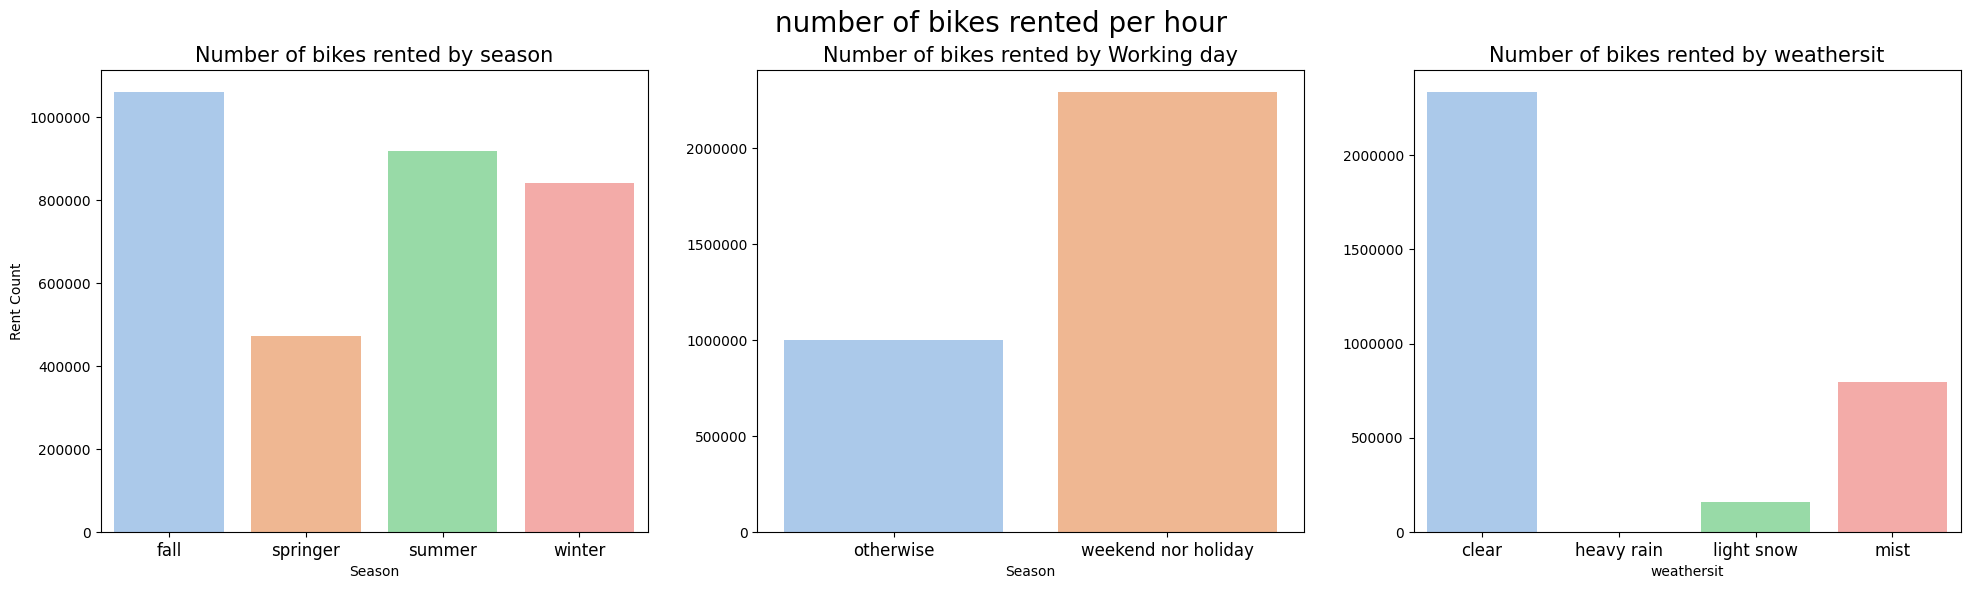

In [16]:
palette = sns.color_palette("pastel") 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

bike_season_perhour_df = hour_df.groupby(by="season").cnt.sum().reset_index()
bike_working_perhour_df = hour_df.groupby(by="workingday").cnt.sum().reset_index()
bike_weathersit_perhour_df = hour_df.groupby(by="weathersit").cnt.sum().reset_index()

bike_season_perhour_df.rename(columns={
    "cnt": "rent_count"
}, inplace=True)

bike_working_perhour_df.rename(columns={
    "cnt": "rent_count"
}, inplace=True)

bike_weathersit_perhour_df.rename(columns={
    "cnt": "rent_count"
}, inplace=True)

# Menyesuaikan format sumbu Y
def currency(x, pos):
    return '%1.0f' % x

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

sns.barplot(x="season", y="rent_count", data=bike_season_perhour_df, palette=palette, ax=ax[0])
ax[0].set_ylabel("Rent Count")
ax[0].set_xlabel("Season")
ax[0].set_title("Number of bikes rented by season", loc="center", fontsize=15)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].yaxis.set_major_formatter(FuncFormatter(currency))

sns.barplot(x="workingday", y="rent_count", data=bike_working_perhour_df, palette=palette, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Season")
ax[1].set_title("Number of bikes rented by Working day", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].yaxis.set_major_formatter(FuncFormatter(currency))

sns.barplot(x="weathersit", y="rent_count", data=bike_weathersit_perhour_df, palette=palette, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("weathersit")
ax[2].set_title("Number of bikes rented by weathersit", loc="center", fontsize=15)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].yaxis.set_major_formatter(FuncFormatter(currency))

plt.suptitle("number of bikes rented per hour", fontsize=20)
plt.show()

### Pertanyaan 2:

C:\Users\msi123\AppData\Local\Temp\ipykernel_33408\190188203.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bike_df = day_df.resample(rule='M', on='dteday').agg({


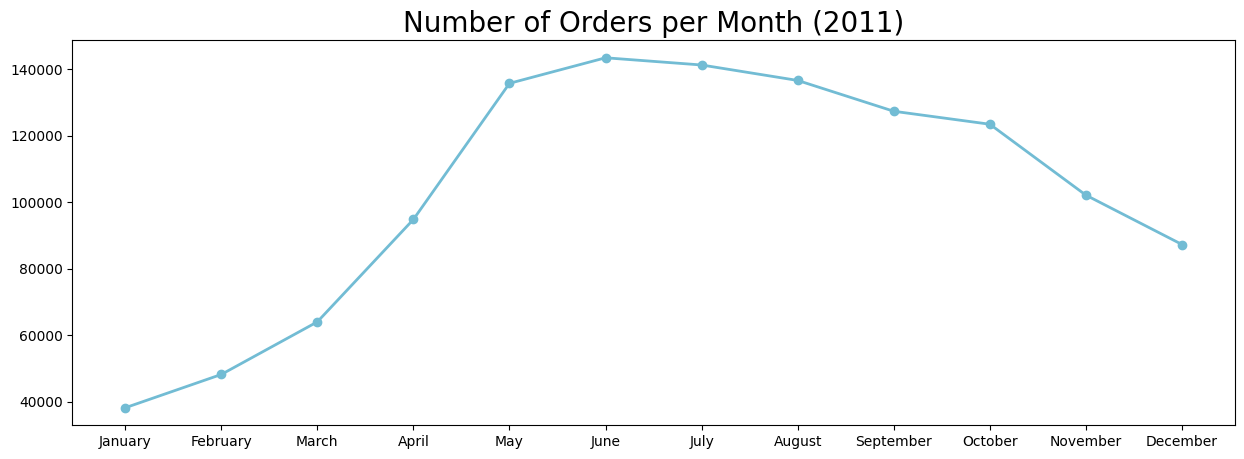

In [17]:
monthly_bike_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

monthly_bike_df = monthly_bike_df.reset_index()
monthly_bike_df.rename(columns={
    "cnt": "count"
}, inplace=True)

# Konversi kolom dteday ke format datetime untuk pemfilteran
monthly_bike_df['dteday'] = pd.to_datetime(monthly_bike_df['dteday'], format='%Y-%m')

# Filter hanya data dari tahun 2011
monthly_bike_df = monthly_bike_df[monthly_bike_df['dteday'].dt.year == 2011]

# Format kembali kolom dteday jika perlu
monthly_bike_df['dteday'] = monthly_bike_df['dteday'].dt.strftime('%B')

plt.figure(figsize=(15, 5)) 
plt.plot(monthly_bike_df["dteday"], monthly_bike_df["count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month (2011)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

C:\Users\msi123\AppData\Local\Temp\ipykernel_33408\2659741357.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bike_df = day_df.resample(rule='M', on='dteday').agg({


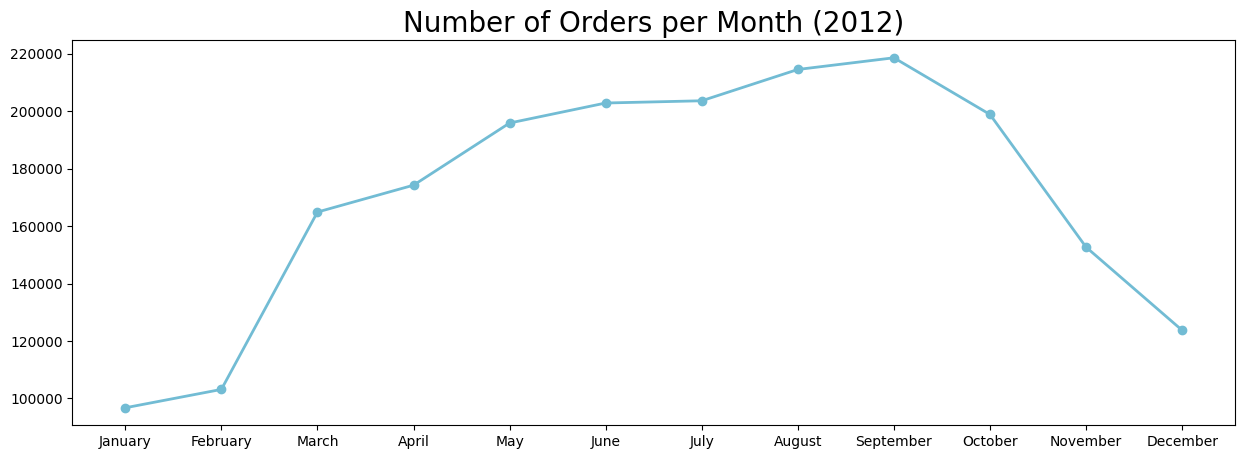

In [18]:
monthly_bike_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

monthly_bike_df = monthly_bike_df.reset_index()
monthly_bike_df.rename(columns={
    "cnt": "count"
}, inplace=True)

# Konversi kolom dteday ke format datetime untuk pemfilteran
monthly_bike_df['dteday'] = pd.to_datetime(monthly_bike_df['dteday'], format='%Y-%m')

# Filter hanya data dari tahun 2011
monthly_bike_df = monthly_bike_df[monthly_bike_df['dteday'].dt.year == 2012]

# Format kembali kolom dteday jika perlu
monthly_bike_df['dteday'] = monthly_bike_df['dteday'].dt.strftime('%B')

plt.figure(figsize=(15, 5)) 
plt.plot(monthly_bike_df["dteday"], monthly_bike_df["count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month (2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

## Conclusion

1. dalam keadaan seperti apa sepeda banyak di sewa?
   pada data rental sepeda per hari, orang orang paling banyak merental sepedah pada saat musim gugur, saat orang orang sedang berlibur dan juga saat cuaca sedang cerah, sedikit awan, berawan sebagian, berawan Sebagian.Sedangkan pada data rental sepedah per jam, hasilnya sama seperti data rental sepeda per hari
   
2. Berapa jumlah sepeda yang disewa setiap bulan?
   pada data rental sepedah per hari, tahun 2011 pada bulan januari sampai dengan bulan juni sepedah yang dirental mengalami penaikan lalu mengalami penurunan pada bulan juli sampai desember, sedangkan pada tahun 2012 bulan januari sampai bulan september mengalami penaikan sedangkan pada bulan september sampai desember mengalami penurunan